<a href="https://colab.research.google.com/github/M-chetan-duh/ML-Smartknower/blob/master/minor_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("/content/datasets_17860_23404_IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data["sepal_length"]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [5]:
data.shape

(150, 5)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,4]

In [8]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)

In [11]:
x_train.shape

(120, 4)

In [12]:
y_train.shape

(120,)

In [13]:
model = KNN(n_neighbors=5,metric='euclidean')

In [14]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
y_pred = model.predict(x_test)

In [16]:
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [17]:
y_test

82     Iris-versicolor
134     Iris-virginica
114     Iris-virginica
42         Iris-setosa
109     Iris-virginica
57     Iris-versicolor
1          Iris-setosa
70     Iris-versicolor
25         Iris-setosa
84     Iris-versicolor
66     Iris-versicolor
133     Iris-virginica
102     Iris-virginica
107     Iris-virginica
26         Iris-setosa
23         Iris-setosa
123     Iris-virginica
130     Iris-virginica
21         Iris-setosa
12         Iris-setosa
71     Iris-versicolor
128     Iris-virginica
48         Iris-setosa
72     Iris-versicolor
88     Iris-versicolor
148     Iris-virginica
74     Iris-versicolor
96     Iris-versicolor
63     Iris-versicolor
132     Iris-virginica
Name: species, dtype: object

In [18]:
accuracy = accuracy_score(y_test,y_pred)*100

In [19]:
print("The accuracy without scaling is",accuracy)

The accuracy without scaling is 93.33333333333333


In [20]:
confusion_matrix(y_test,y_pred)

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.82      0.90        11
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [23]:
scalar = MinMaxScaler()
x_train1= scalar.fit_transform(x_train)
x_test1= scalar.transform(x_test)

In [24]:
model.fit(x_train1,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
new_ypred = model.predict(x_test1)

In [26]:
accuracy_after_scaling= accuracy_score(y_test,new_ypred)*100

In [27]:
print("The accuarcy after scaling is",accuracy_after_scaling)

The accuarcy after scaling is 90.0


In [39]:
from sklearn.model_selection import cross_val_score
knn_cv = KNN()
cv_scores = cross_val_score(knn_cv,x_train,y_train,cv=5)
print(cv_scores)
print("the accuracy after cross validating is ",np.mean(cv_scores)*100)

[1.         1.         1.         0.95833333 0.95833333]
the accuracy after cross validating is  98.33333333333334


The accuracy of the model increased from 93.33 percent to 98.33 percent

In [40]:
no_neighbors= np.arange(1,8)

In [41]:
print(no_neighbors)

[1 2 3 4 5 6 7]


In [42]:
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

In [43]:
for i, k in enumerate(no_neighbors):
    
    knn = KNN(n_neighbors=k)
  
    knn.fit(x_train,y_train)
    
    
    train_accuracy[i] = knn.score(x_train, y_train)

    
    test_accuracy[i] = knn.score(x_test, y_test)

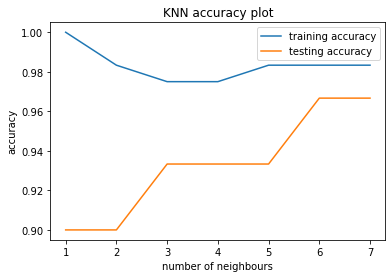

In [44]:
plt.plot(no_neighbors,train_accuracy,label = "training accuracy")
plt.plot(no_neighbors,test_accuracy,label  = "testing accuracy")
plt.title("KNN accuracy plot")
plt.legend()
plt.xlabel("number of neighbours")
plt.ylabel("accuracy")
plt.show()